# House price prediction using ridge and lasso:  building a advance regression model for the prediction of house prices

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house

## Goal

We need to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

----

### Approach of Solving the problem:
    
**We are going to solve the problem in 4 sections i.e. :**
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

# *`Step 1: Data understanding and exploration`*

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import missingno as mn
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the housing price dataset
house = pd.read_csv(r"C:\Upgrad Program\Machine Learning 2\Advanced regression assignment\train.csv")

In [3]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Inspecting the various aspects of house pricing data frame

In [4]:
# Number of rows and columns
house.shape

(1460, 81)

In [5]:
# summary of dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# insights of the features
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Null value treatment

In [7]:
#checking duplicates
sum(house.duplicated(subset = 'Id')) == 0

True

> **Insights:** There are no duplicated id in the dataset

In [8]:
# Checking for percentage nulls
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

> **Insights:** There are few null values in the dataset

<AxesSubplot:>

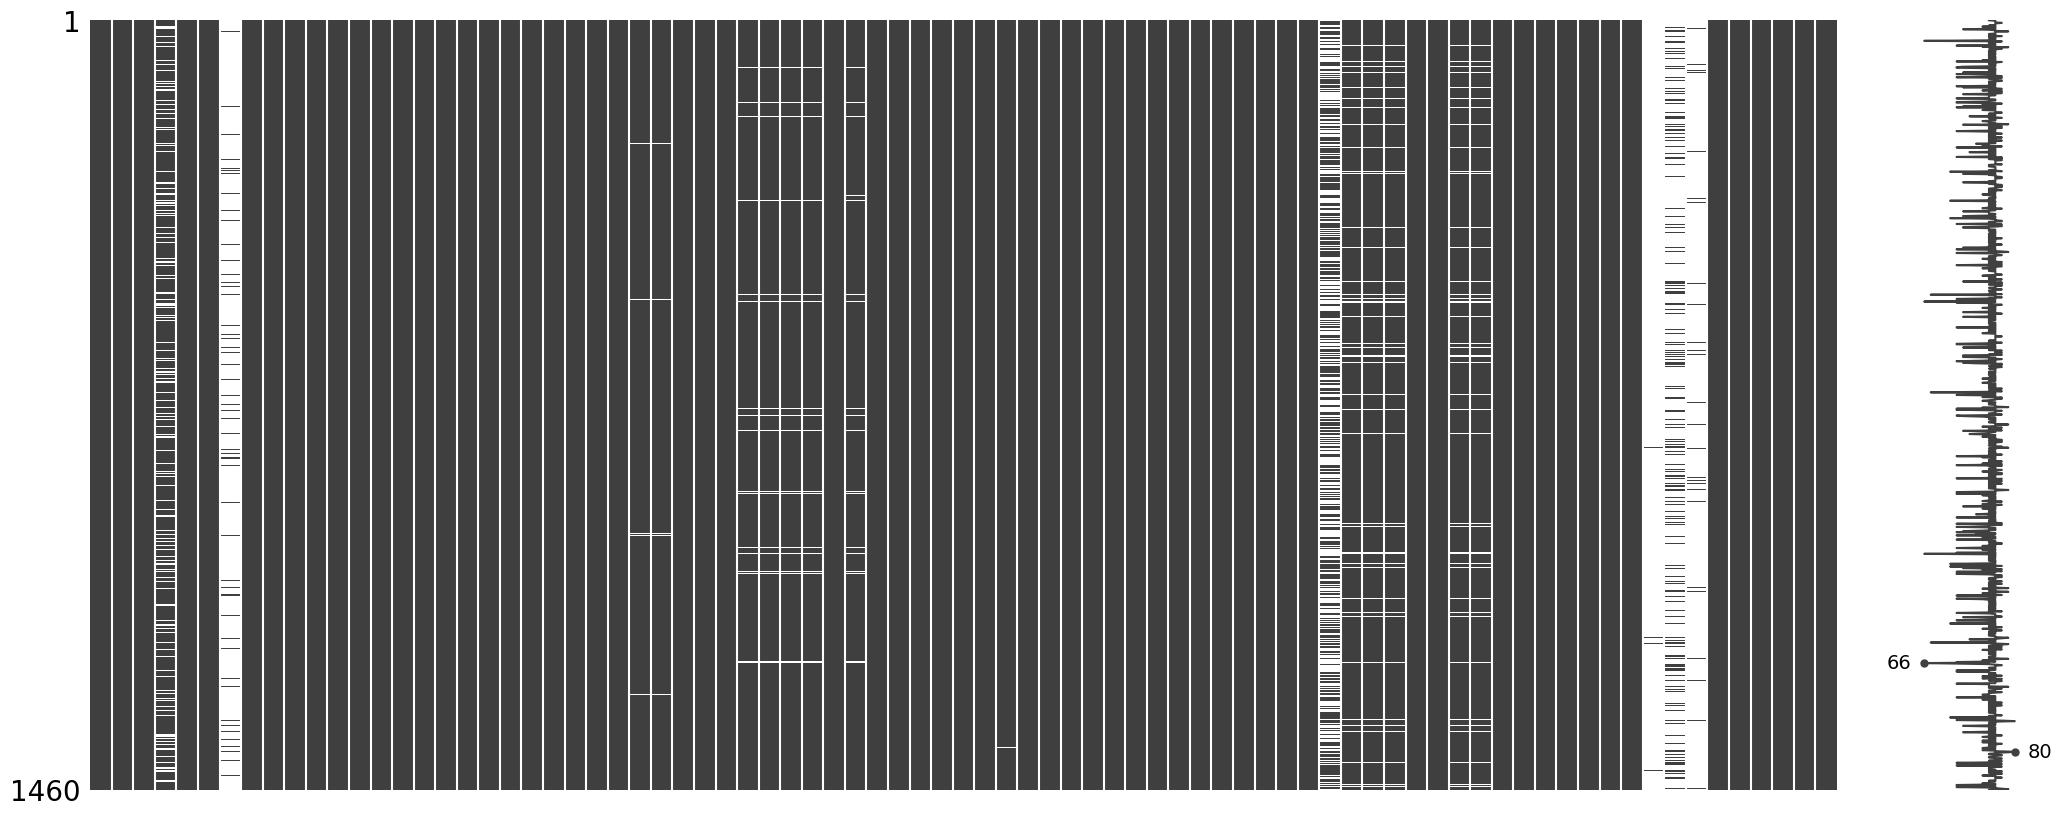

In [9]:
# Checking is any missing values are there
mn.matrix(house)

In [10]:
# as we can see that there are multiple columns with high nulls, lets group them together
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [11]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# so to ignore the above mistreatment of data, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [12]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
#check null value again
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [14]:
# insights of the features 
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
# As "LotFrontage" is Linear feet of street connected to property and it is numeric features with a fair distribution, it can be imputed with similar 'Neighborhood' values
#similarly we will impute few features just to make calculation more predictable
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["Electrical"].dropna(inplace=True)

In [16]:
# Check the no. of rows retained
len(house.index)

1460

<AxesSubplot:>

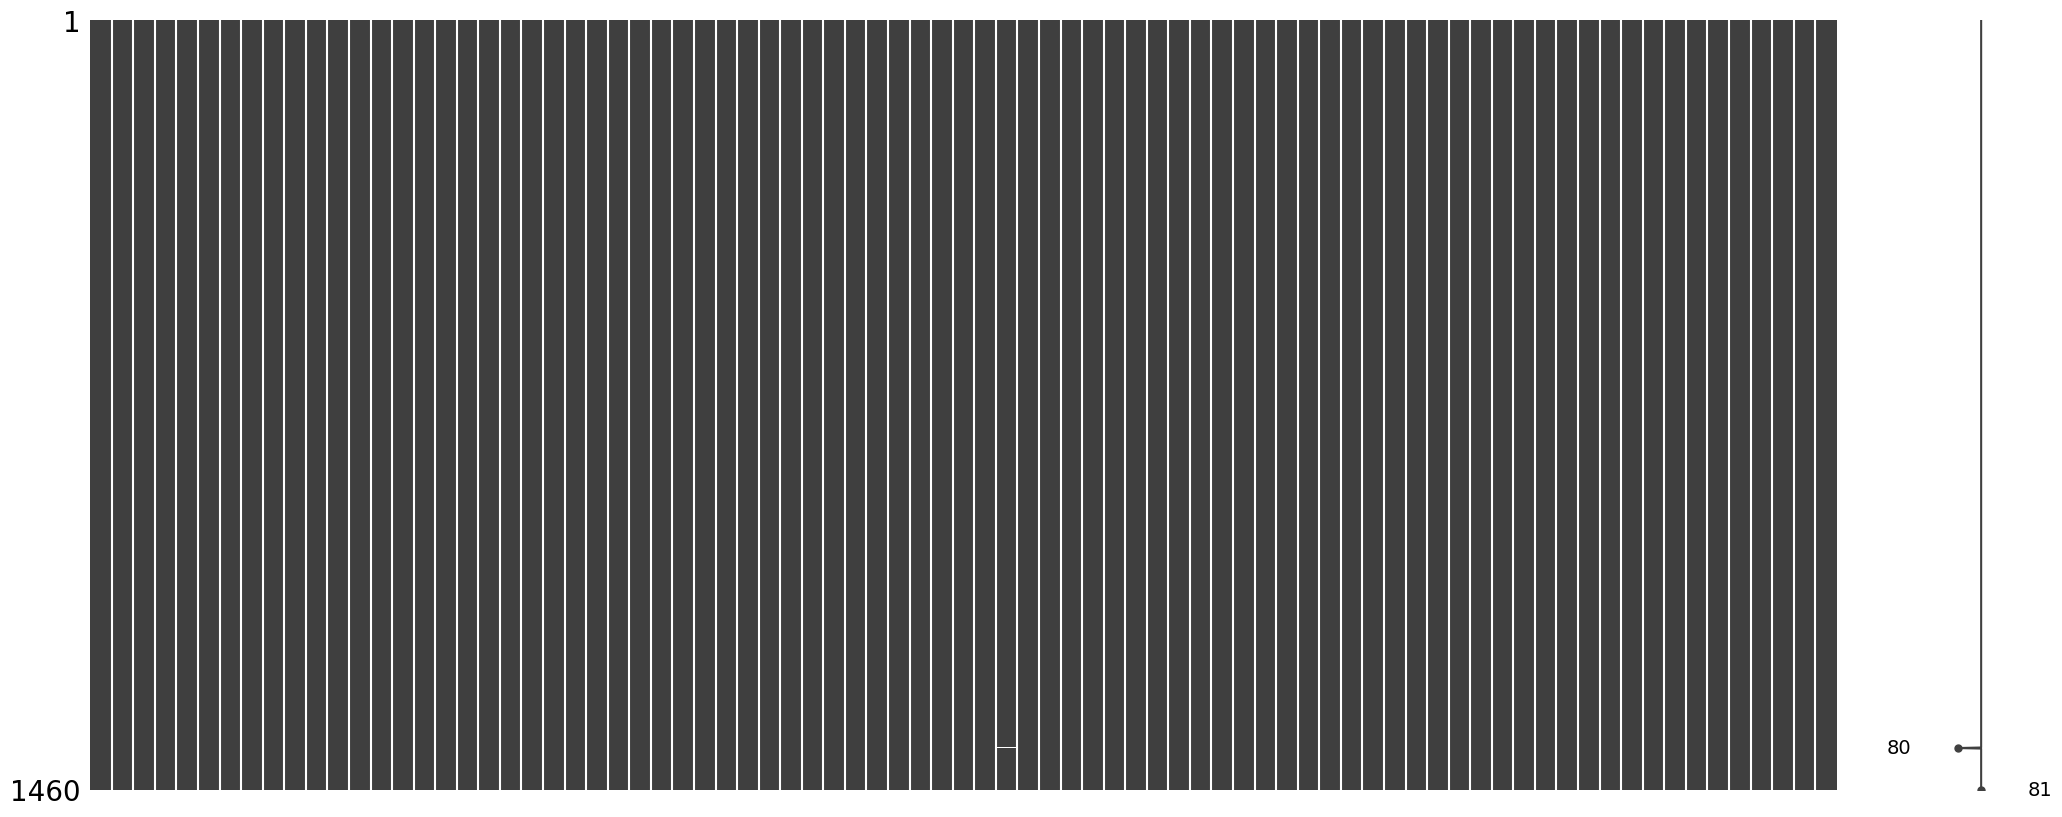

In [17]:
mn.matrix(house)

In [20]:
house.shape

(1460, 81)

# *`Step 2: Data Visualization`*

### Plot of 'Sale Price' vs other factors

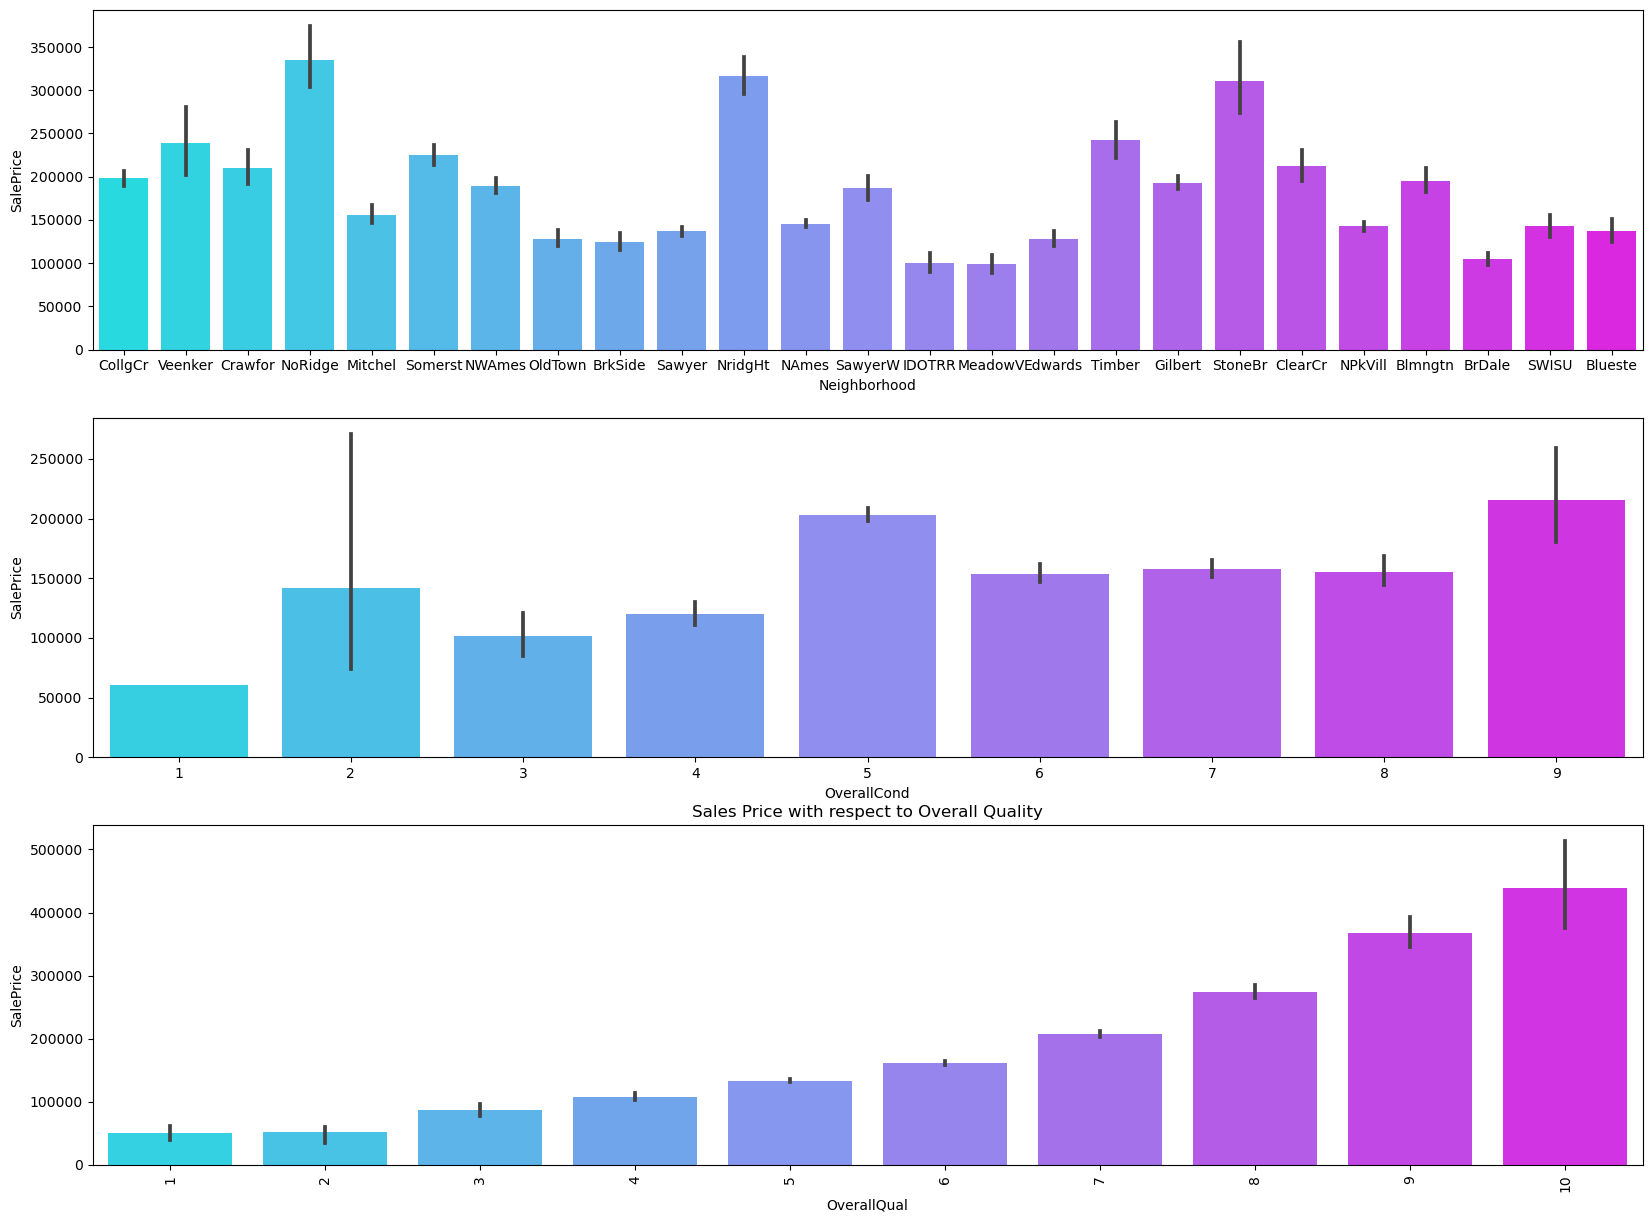

In [21]:
fig, axes = plt.subplots(3, 1, figsize = (20,15))
#create chart in each subplot
sns.barplot(x="Neighborhood", y="SalePrice", data= house,palette='cool', ax=axes[0])
plt.title("Sales Price with respect to Neighbourhood")
sns.barplot(x="OverallCond", y="SalePrice", data= house,palette='cool', ax=axes[1])
plt.title("Sales Price with respect to Overall Condition")
sns.barplot(x="OverallQual", y="SalePrice", data= house,palette='cool', ax=axes[2])
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)
plt.show()

> **Insights:** Increase in the overall quality has a direct positive effect on the sale price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

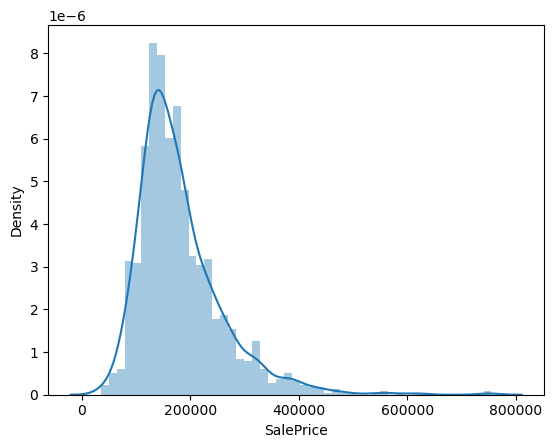

In [22]:
sns.distplot(house['SalePrice'])

> **Insights:** The Saleprice figures are skewed towards left, so we need to apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

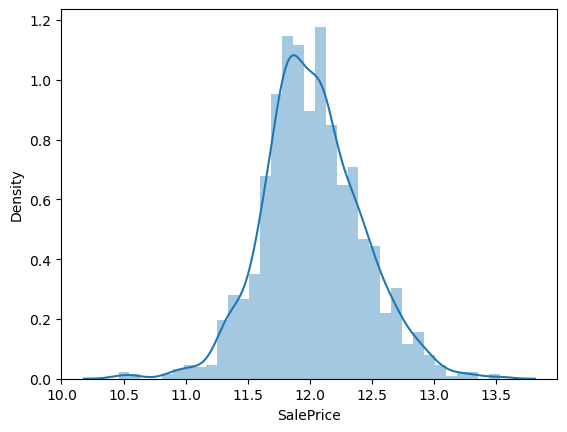

In [23]:
#Log Transformation
house['SalePrice']=np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])

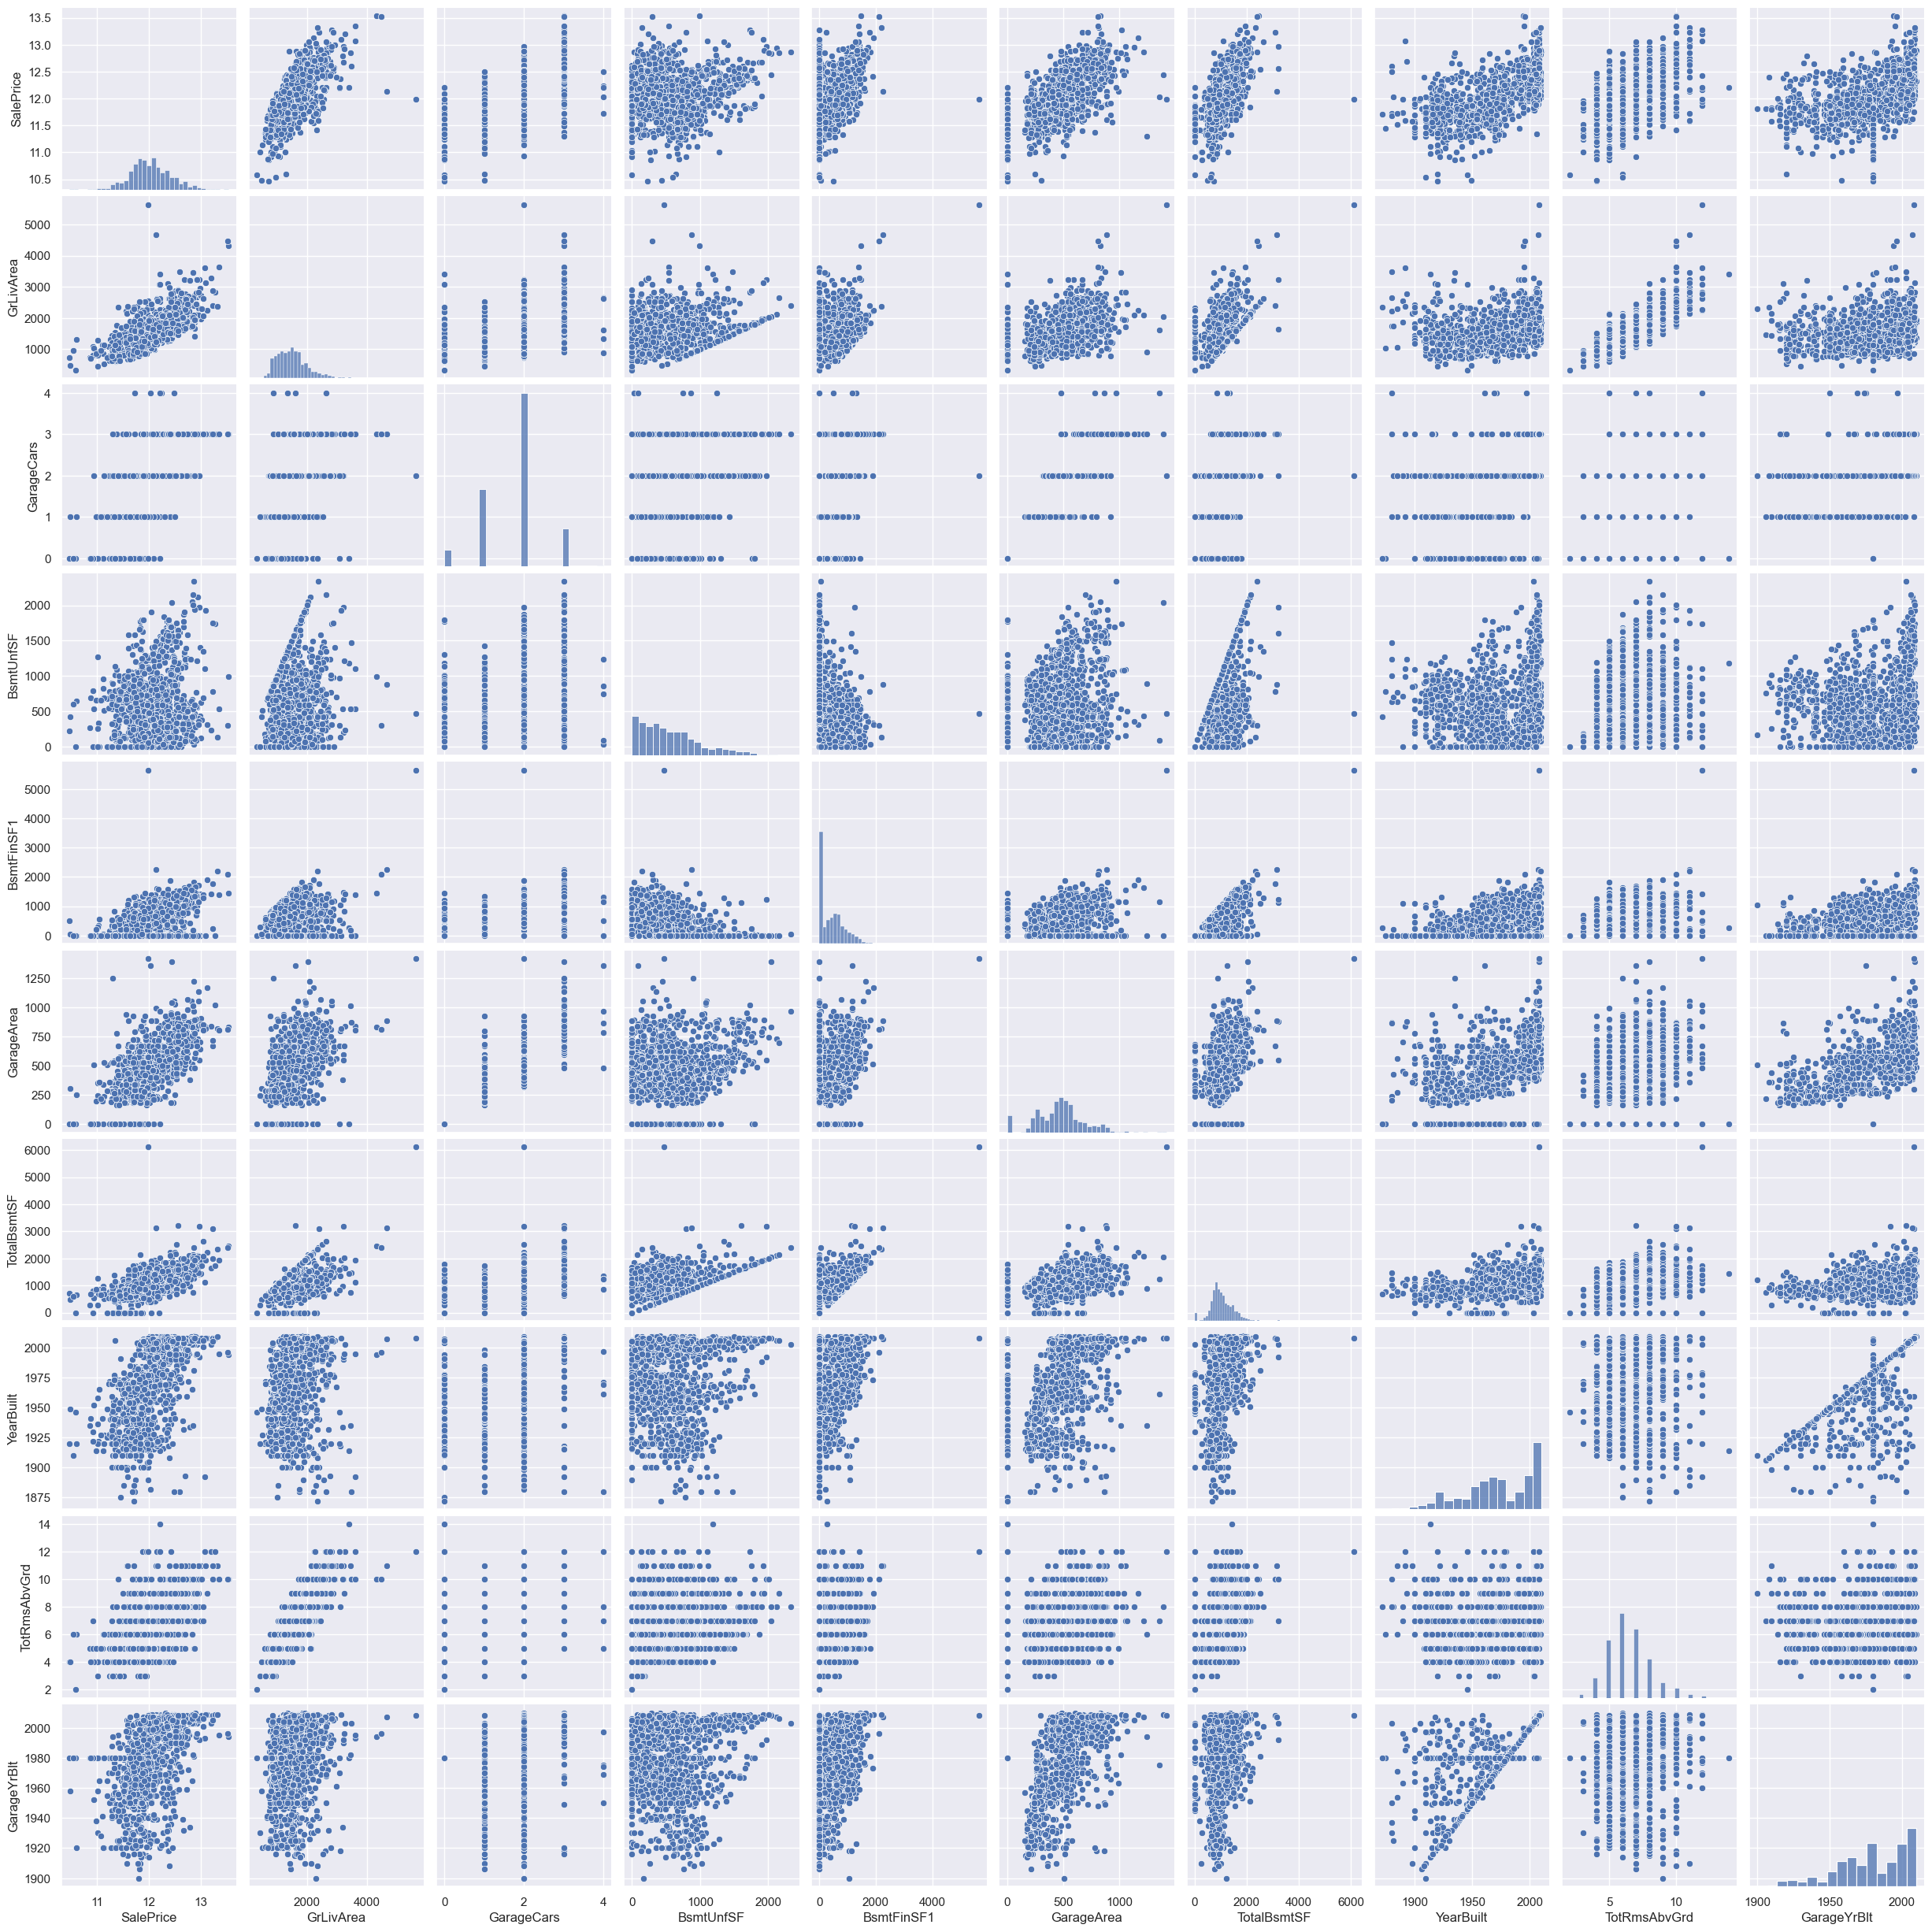

In [24]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

> **Insights:** It is clear that few columns are correlated and not contributing to 'SalePrice'. So we will drop those columns

In [25]:
house = house.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'], axis = 1)
house.head()   

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   none  none        none       0      2   
1         Lvl    AllPub  ...        0   none  none        none       0      5   
2         Lvl    AllPub  ...        0   none  none        none       0      9   
3         Lvl    AllPub  ...        0   none  none        none       0      2   
4         Lvl    AllPub  ...        0   none  none        none       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247699  
1   2007        WD         Normal  12.109016  
2   2008        WD         Normal  12.317171  
3   2006        WD        Abnorml  11.849405  
4   2008        WD         Normal  12.429220  

[5 rows x 77 columns]

### Now we will analyse only numeric columns 

In [26]:
#Numeric columns
house_numerical = house.select_dtypes(exclude=['object'])

In [27]:
house_numerical.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.199658   10516.828082     6.099315   
std     421.610009    42.300571    22.431902    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.280000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold    SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753    12.024057  
std      40.177307    496.123024     2.703626     1.328095     0.399449  
min       0.000000      0.000000     1.000000  2006.000000    10.460271  
25%       0.000000      0.000000     5.000000  2007.000000    11.775105  
50%       0.000000      0.000000     6.000000  2008.000000    12.001512  
75%       0.000000      0.000000     8.000000  2009.000000    12.273736  
90%       0.000000      0.000000    10.000000  2010.000000    12.535380  
95%       0.000000      0.000000    11.000000  2010.000000    12.694962  
99%       0.000000    700.000000    12.000000  2010.000000    13.000325  
max     738.000000  15500.000000    12.000000  2010.000000    13.534474  

[11 rows x 34 columns]

In [28]:
# correlation matrix
cor = house_numerical.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.017942   -0.073959     0.353288  0.257320     0.817185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0.522396   
1stFlrSF         -0.144203   0.281986      0.240379    0.339850    0.445863   
2ndFlrSF          0.028942   0.010308      0.140024    0.173800   -0.137079   
LowQualFinSF      0.025494  -0.183784     -0.062419   -0.068628   -0.064503   
GrLivArea        -0.079686   0.199010      0.287389    0.388052    0.208171   
BsmtFullBath     -0.054942   0.187599      0.119470 

### Plotting correlation through heatmap

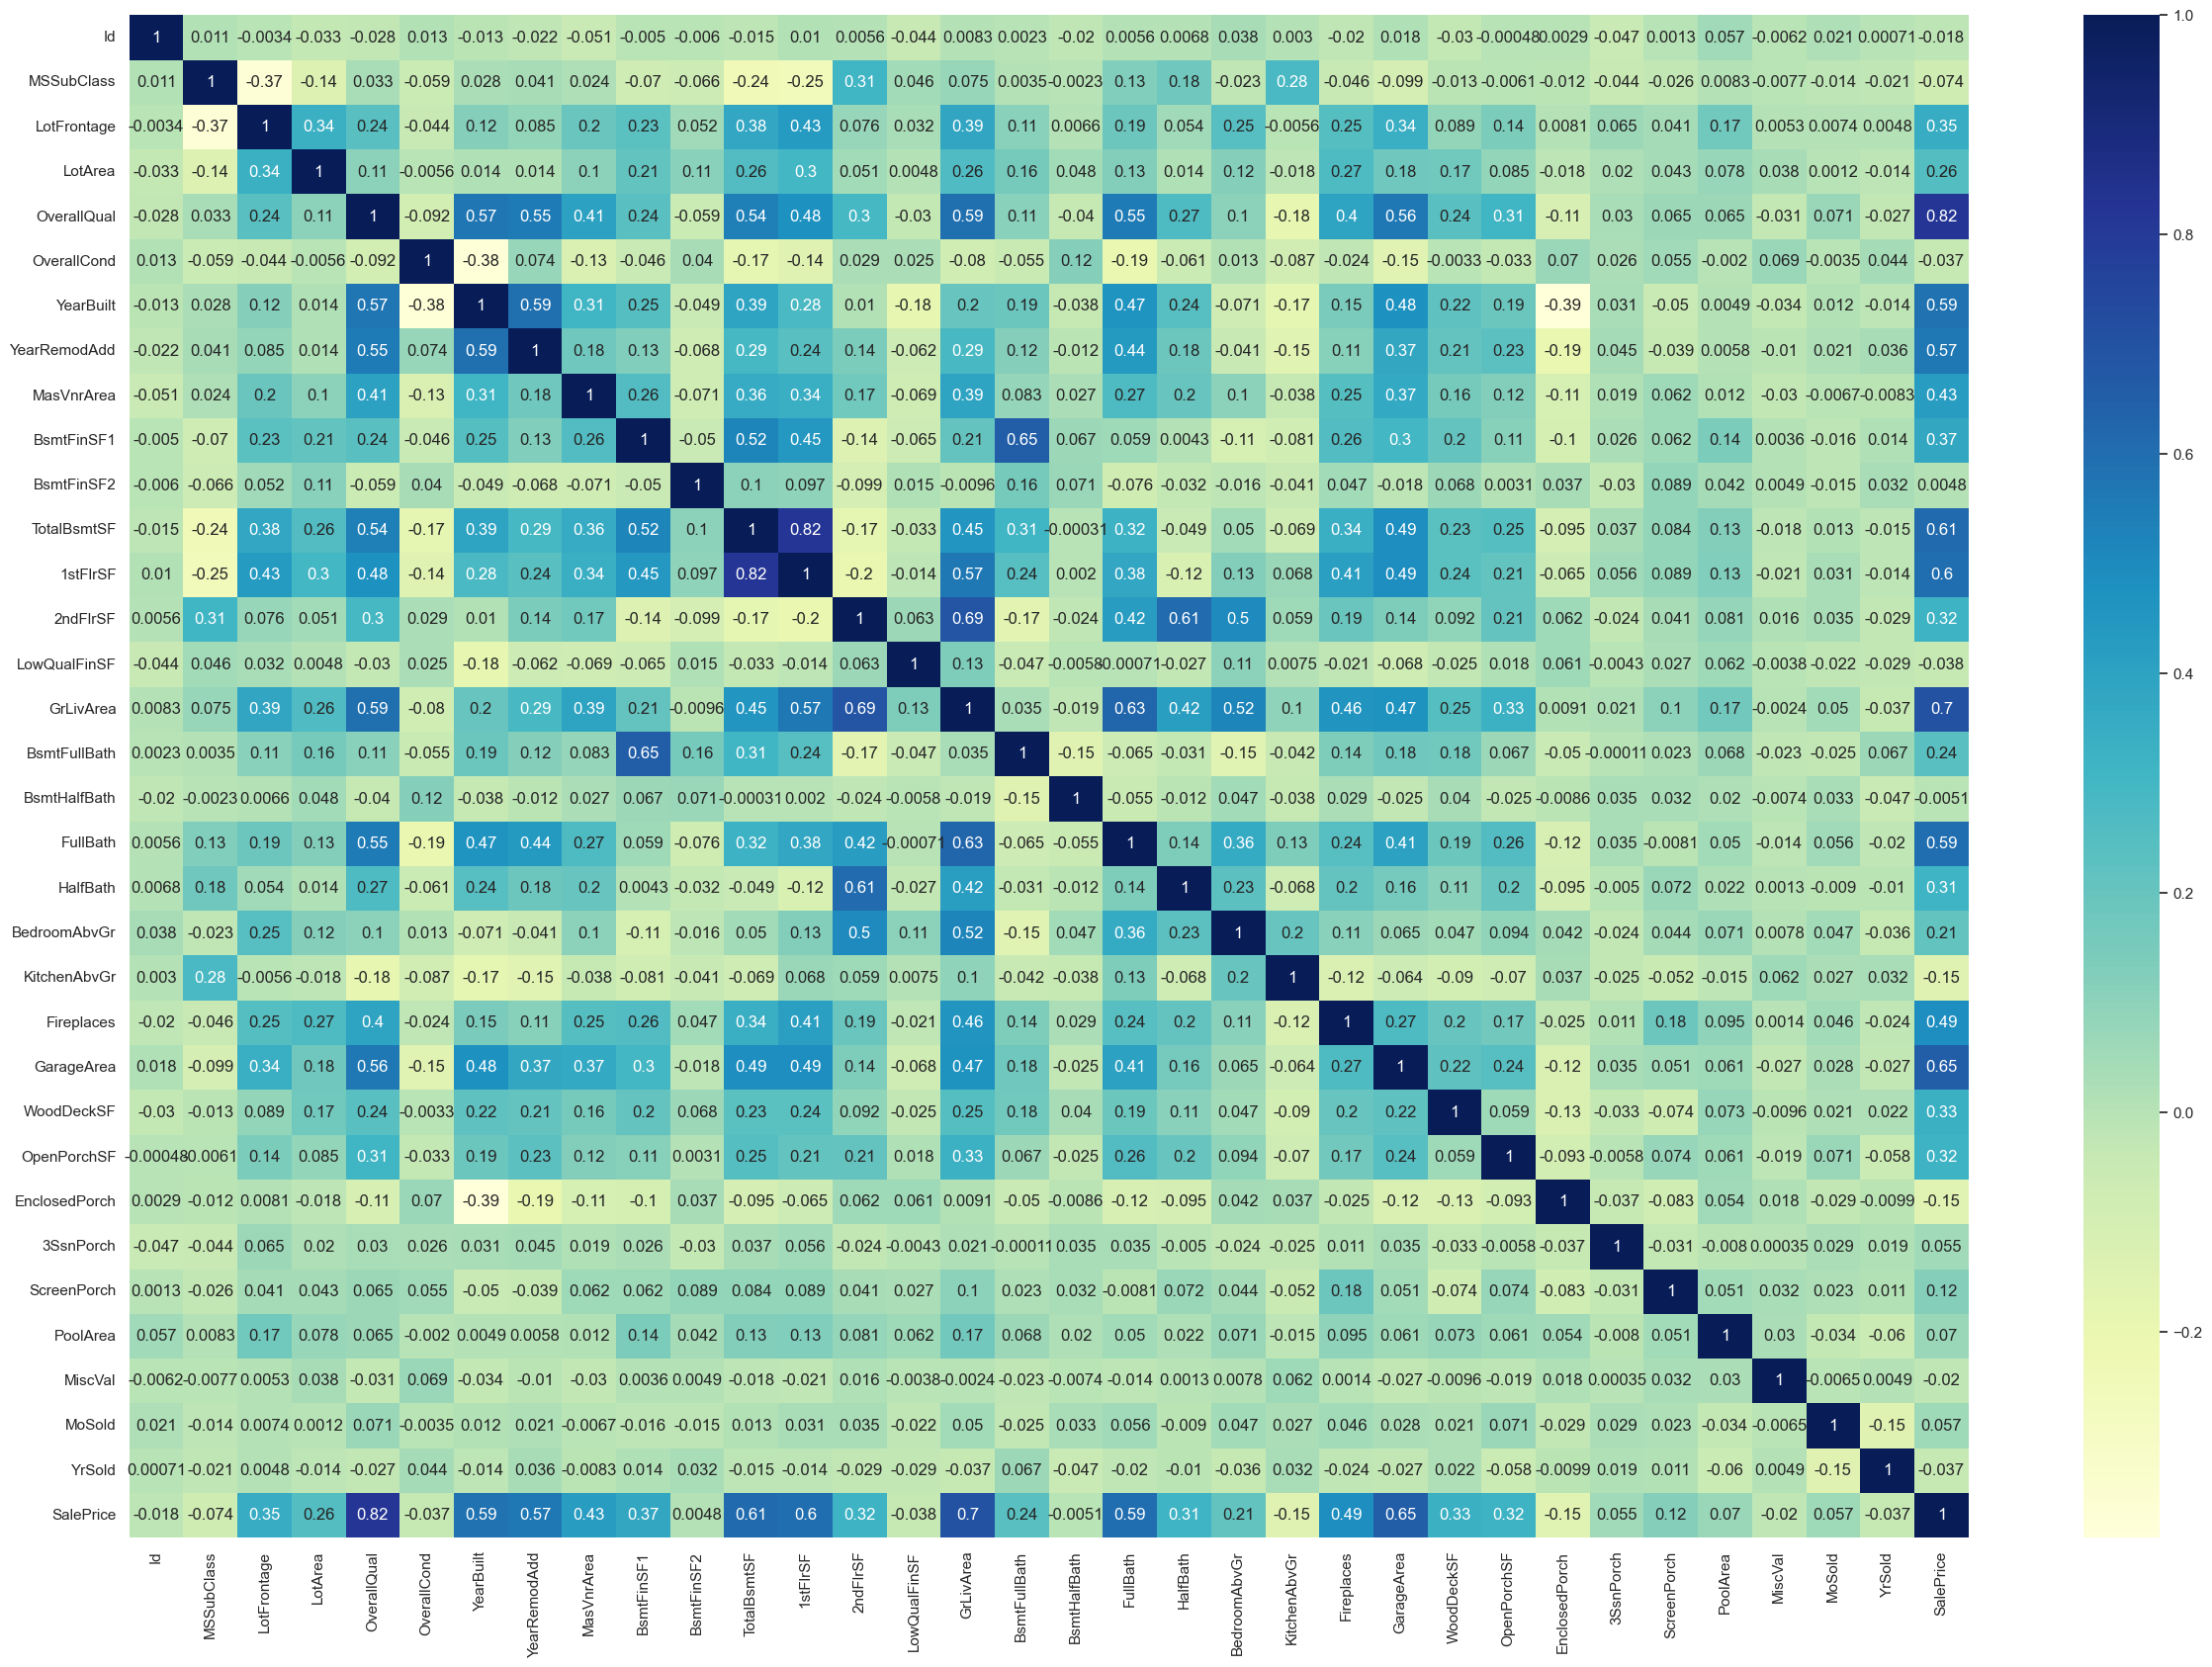

In [29]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

> **Insights:** We can see that some of the variables are correlated. So before dropping columns, we will first check their predictive power and analyse their their relationship using pairplot

Lets plot boxplot for the selected columns and examine the distribution. Also, we will remove the outliers based on the percentile distribution over them

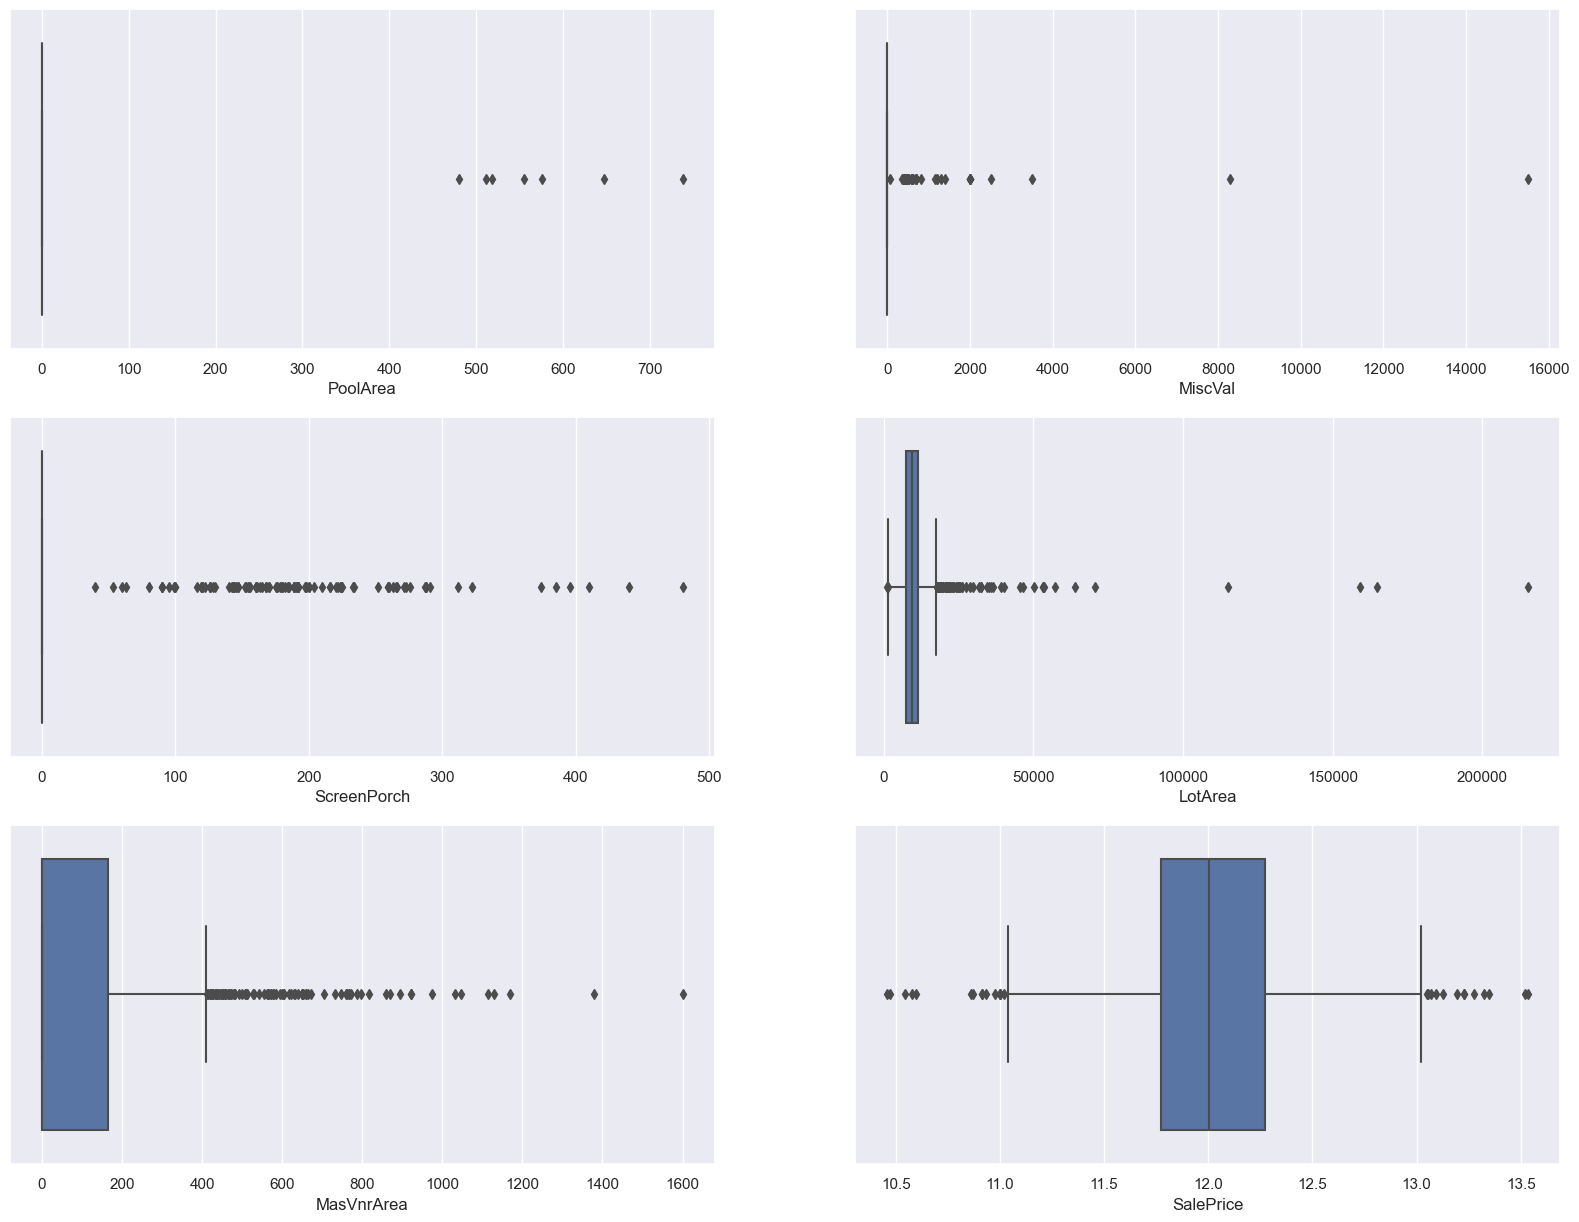

In [30]:
fig, axes = plt.subplots(3, 2, figsize = (20,15))
#create chart in each subplot
sns.boxplot(house['PoolArea'], ax=axes[0,0])
sns.boxplot(house['MiscVal'], ax=axes[0,1])
sns.boxplot(house['ScreenPorch'], ax=axes[1,0])
sns.boxplot(house['LotArea'],ax=axes[1,1])
sns.boxplot(house['MasVnrArea'], ax=axes[2,0])
sns.boxplot(house['SalePrice'], ax=axes[2,1])
plt.show()

In [31]:
house.shape

(1460, 77)

> **Insights:** Here we see that there are many outliers which needs to be mende/removed for better prediction of model. We will only consider the data which will satisfy the within the range of quatiles 0.1 and 0.9. 

### Outlier Treatment

In [32]:
outlier_treatment = {'PoolArea','MiscVal','ScreenPorch','LotArea','MasVnrArea','SalePrice'}
for i in outlier_treatment:
    Q1 = house[i].quantile(0.1)
    Q3 = house[i].quantile(0.9)
    IQR = Q3 - Q1
    house = house[(house[i] >= Q1 - 1.5*IQR) & 
                      (house[i] <= Q3 + 1.5*IQR)]

In [33]:
# Now few rows should be removed
house.shape

(1263, 77)

let's plot jointplot to get the clear visuals on the factors that contribute with respect to Sales Price

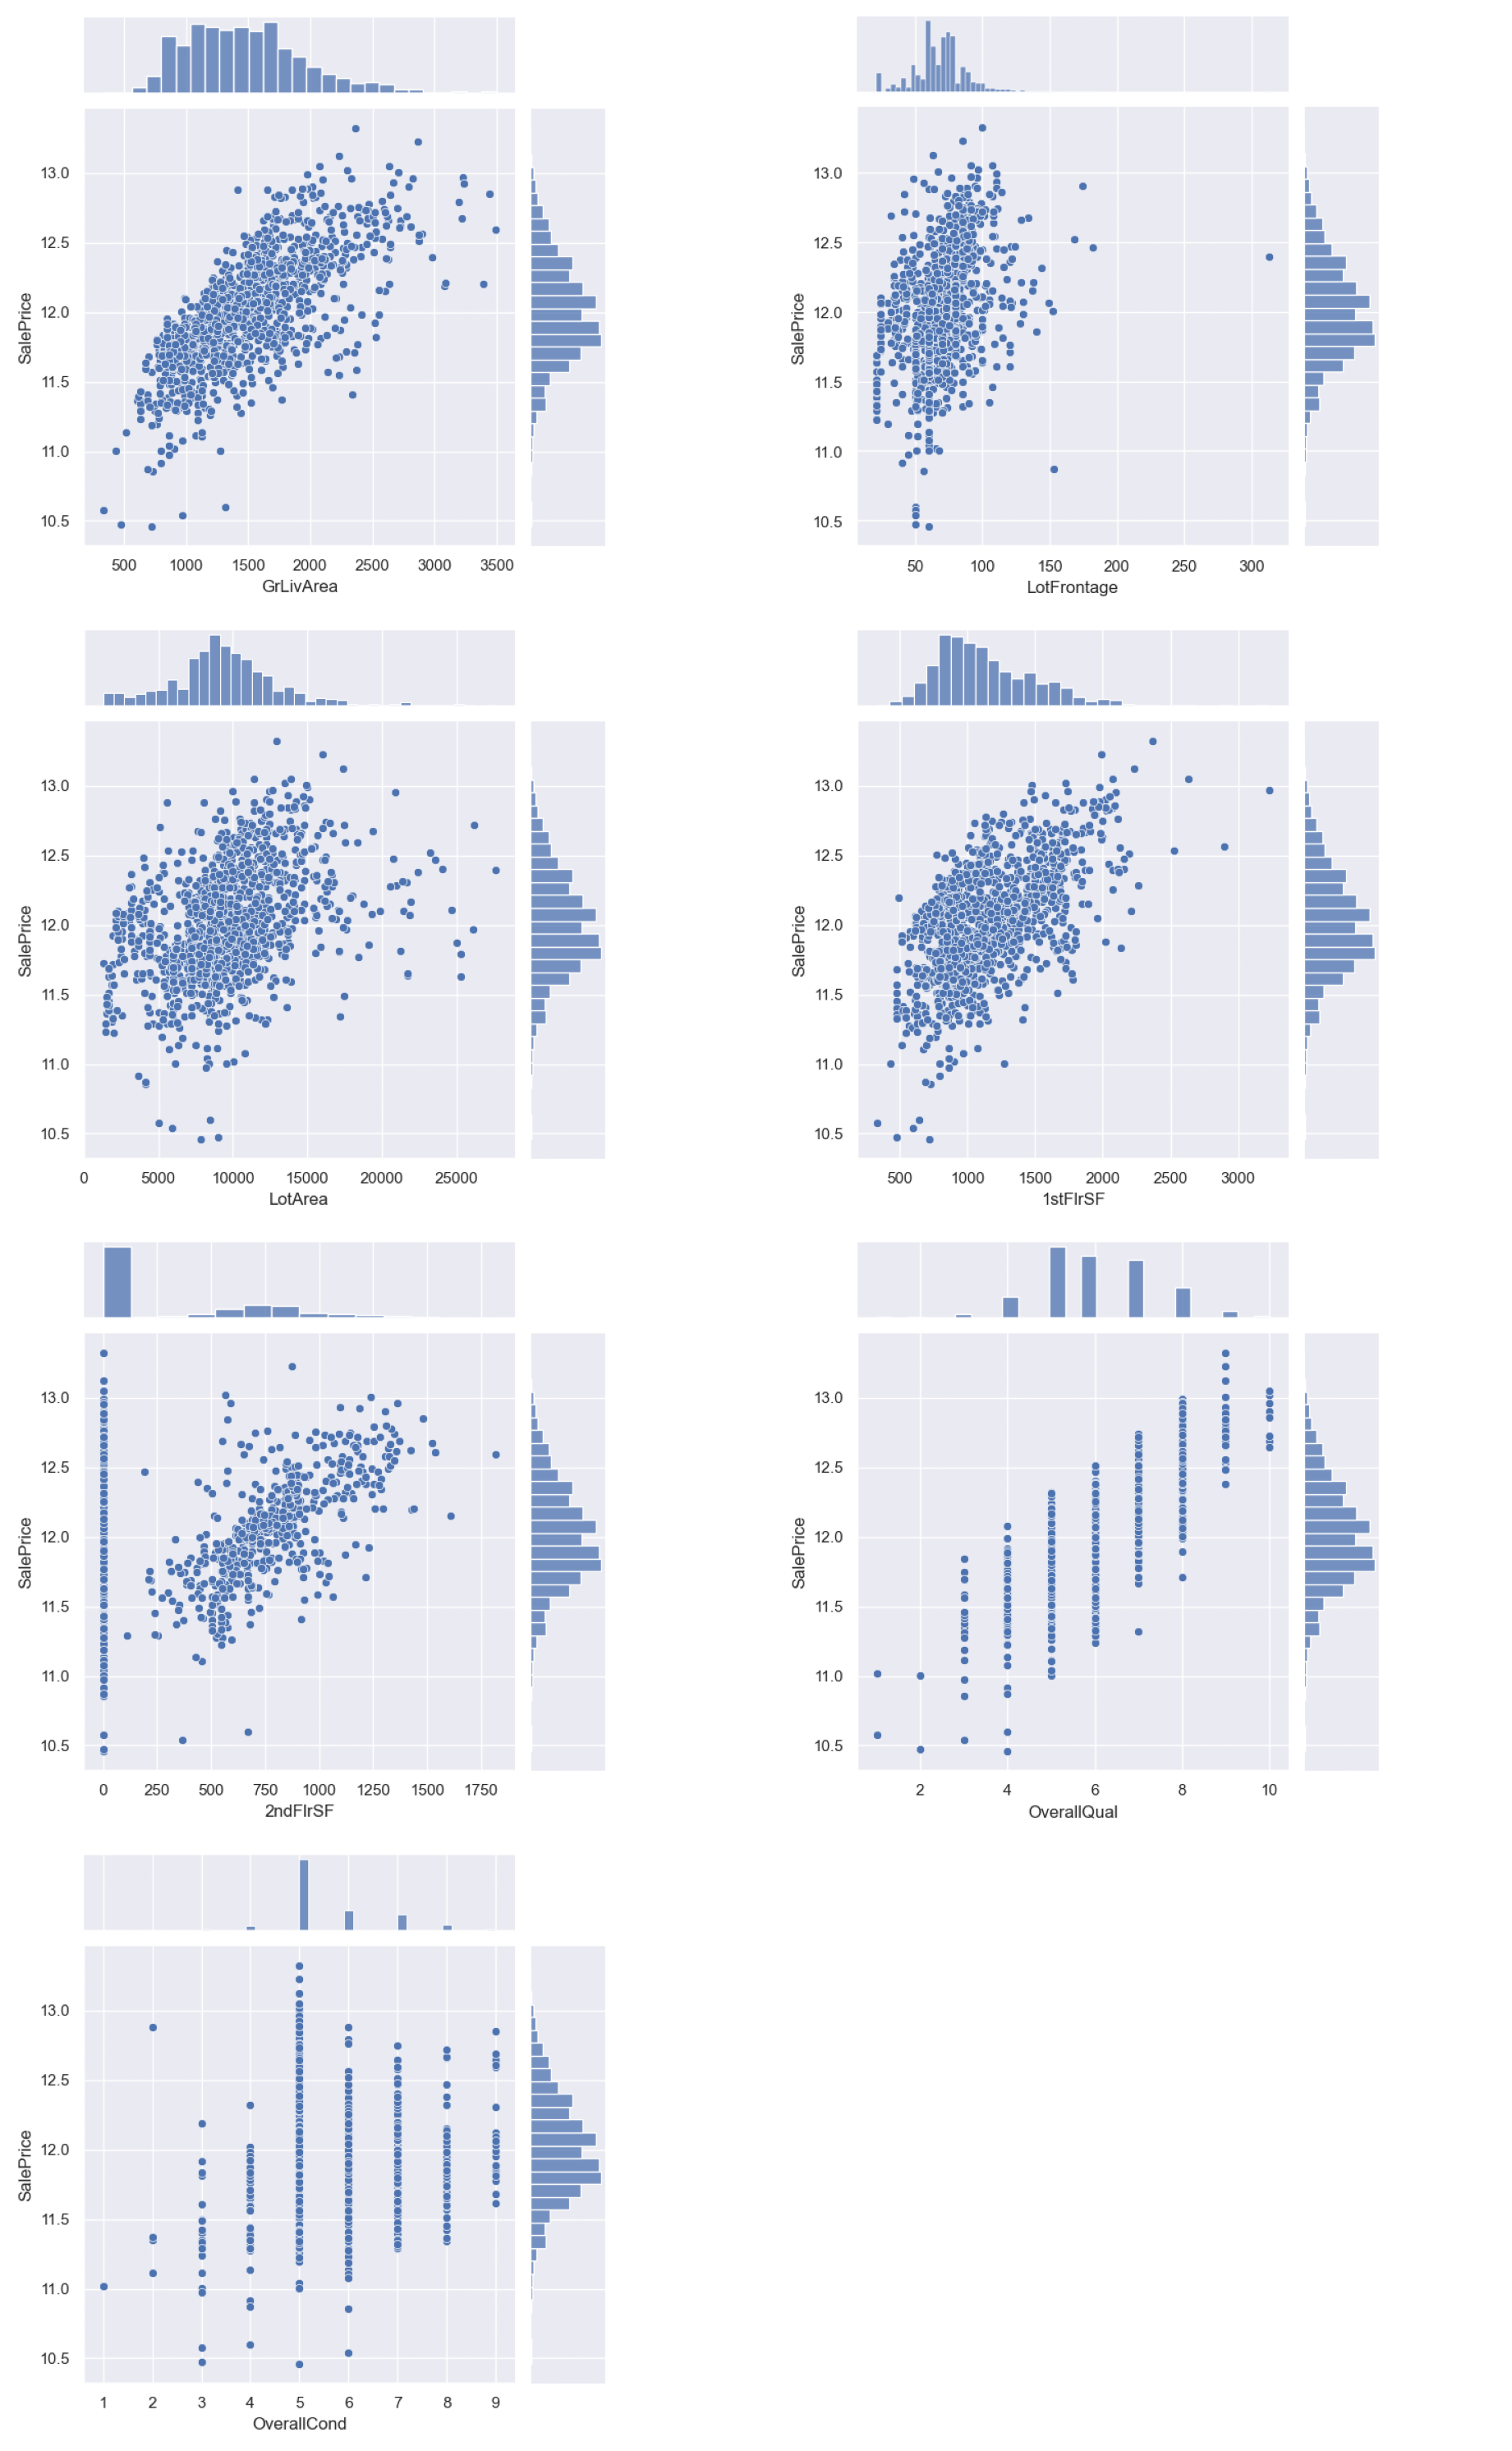

In [34]:
fig, axarr = plt.subplots(4, 2, figsize = (20,30))
#create chart in each subplot
g0 = sns.jointplot(x = house['GrLivArea'], y = house['SalePrice'])
g1 = sns.jointplot(x = house['LotFrontage'], y = house['SalePrice'])
g2 = sns.jointplot(x = house['LotArea'], y = house['SalePrice'])
g3 = sns.jointplot(x = house['1stFlrSF'], y = house['SalePrice'])
g4 = sns.jointplot(x = house['2ndFlrSF'], y = house['SalePrice']) 
g5 = sns.jointplot(x = house['OverallQual'], y = house['SalePrice'])
g6 = sns.jointplot(x=house['OverallCond'], y = house['SalePrice'])

g0.savefig('g0.png')
plt.close(g0.fig)

g1.savefig('g1.png')
plt.close(g1.fig)

g2.savefig('g2.png')
plt.close(g2.fig)

g3.savefig('g3.png')
plt.close(g3.fig)

g4.savefig('g4.png')
plt.close(g4.fig)

g5.savefig('g5.png')
plt.close(g5.fig)

g6.savefig('g6.png')
plt.close(g6.fig)

axarr[0,0].imshow(mpimg.imread('g0.png'))
axarr[0,1].imshow(mpimg.imread('g1.png'))
axarr[1,0].imshow(mpimg.imread('g2.png'))
axarr[1,1].imshow(mpimg.imread('g3.png'))
axarr[2,0].imshow(mpimg.imread('g4.png'))
axarr[2,1].imshow(mpimg.imread('g5.png'))
axarr[3,0].imshow(mpimg.imread('g6.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

> **Insights:**
>
>- Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase
>- We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [35]:
# PropAge can be caculated as the difference between Property Age from yearsold  and yearbuilt
house['PropAge'] = (house['YearBuilt'] - house['YrSold'])
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   none  none        none       0      2   2008   
1         Lvl    AllPub  ...   none  none        none       0      5   2007   
2         Lvl    AllPub  ...   none  none        none       0      9   2008   
3         Lvl    AllPub  ...   none  none        none       0      2   2006   
4         Lvl    AllPub  ...   none  none        none       0     12   2008   

  SaleType  SaleCondition  SalePrice  PropAge  
0       WD         Normal  12.247699       -5  
1       WD         Normal  12.109016      -31  
2       WD         Normal  12.317171       -7  
3       WD        Abnorml  11.849405      -91  
4       WD         Normal  12.429220       -8  

[5 rows x 78 columns]

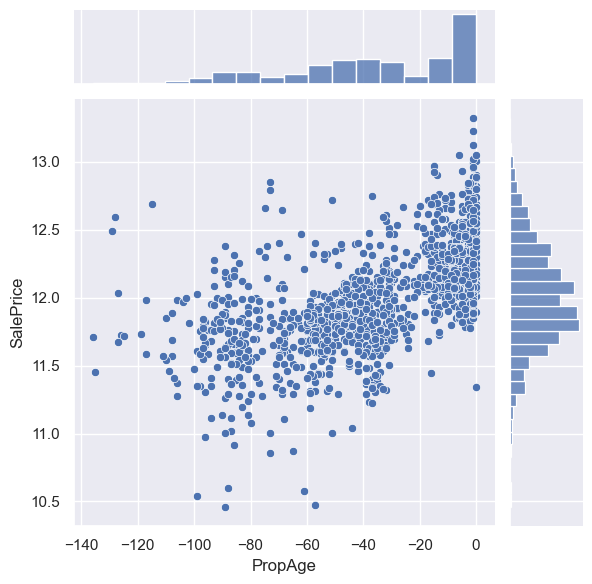

In [36]:
# Let's plot jointplot between PropAge vs SalePrice, and observe the trend
sns.jointplot(x = house['PropAge'], y = house['SalePrice'])
plt.show()

> **Insights:** Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

###  Let's drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further 

In [37]:
house = house.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1)
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   none  none        none   
1         Lvl    AllPub  ...           0        0   none  none        none   
2         Lvl    AllPub  ...           0        0   none  none        none   
3         Lvl    AllPub  ...           0        0   none  none        none   
4         Lvl    AllPub  ...           0        0   none  none        none   

  MiscVal SaleType  SaleCondition  SalePrice PropAge  
0       0       WD         Normal  12.247699      -5  
1       0       WD         Normal  12.109016     -31  
2       0       WD         Normal  12.317171      -7  
3       0       WD        Abnorml  11.849405     -91  
4       0       WD         Normal  12.429220      -8  

[5 rows x 74 columns]

In [38]:
house.Street.value_counts()

Pave    1261
Grvl       2
Name: Street, dtype: int64

In [39]:
house.Utilities.value_counts()

AllPub    1263
Name: Utilities, dtype: int64

> **Insights:** We can also drop columns that show very low variance and thus not required for predictions

In [40]:
house = house.drop(['Street','Utilities'], axis = 1)

### There are few columns, having high null values, and some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

In [41]:
house = house.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [42]:
house.shape

(1263, 63)

# *`Step 3: Data Preparation`*

Now as we have removed the redundant columns, its time to organize our categorical data into dummy variables i.e. in the form of binary values 0s and 1s, which will be easily feasible while doing linear regression model

In [43]:
#Check for the datatypes
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscFeature       object
SaleType          object
SaleCondition     object
SalePrice        float64
PropAge            int64
Length: 63, dtype: object

In [44]:
# Drop 'Id' from Dataframe
house = house.drop(['Id'], axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0          0   
1       Gtl      Veenker      Feedr  ...           0             0          0   
2       Gtl      CollgCr       Norm  ...          42             0          0   
3       Gtl      Crawfor       Norm  ...          35           272          0   
4       Gtl      NoRidge       Norm  ...          84             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice PropAge  
0            0        0        none       WD        Normal  12.247699      -5  
1            0        0        none       WD        Normal  12.109016     -31  
2            0        0        none       WD        Normal  12.317171      -7  
3            0        0        none       WD       Abnorml  11.849405     -91  
4            0        0        none       WD        Normal  12.429220      -8  

[5 rows x 62 columns]

Before proceeding to analysing variable, lets look closely on the distribution of variables and their impact 

In [45]:
#type of each feature in data: int, float, object
types = house.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [46]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

> **Insights:** we should convert numeric_type to a list to make it easier to work with

In [47]:
numerical_columns = list(numeric_type.index)
categorical_columns = list(categorical_type.index)
print("Categorical Columns : ",categorical_columns)
print("\n\nNumerical Columns : " ,numerical_columns)

Categorical Columns :  ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Numerical Columns :  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


## Dummy Variables

Lets create Dummy columns to convert categorical into numerical

In [48]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0          0   
1       Gtl      Veenker      Feedr  ...           0             0          0   
2       Gtl      CollgCr       Norm  ...          42             0          0   
3       Gtl      Crawfor       Norm  ...          35           272          0   
4       Gtl      NoRidge       Norm  ...          84             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice PropAge  
0            0        0        none       WD        Normal  12.247699      -5  
1            0        0        none       WD        Normal  12.109016     -31  
2            0        0        none       WD        Normal  12.317171      -7  
3            0        0        none       WD       Abnorml  11.849405     -91  
4            0        0        none       WD        Normal  12.429220      -8  

[5 rows x 62 columns]

In [49]:
# convert into dummies
house_dummy = pd.get_dummies(house, drop_first=True )
house_dummy.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 208 columns]

In [50]:
# concat dummy variables with X
#house = pd.concat([house, house_dummy], axis=1)
house.shape

(1263, 62)

In [51]:
#Dropping SalePrice to get the X variables
X = house_dummy.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 207 columns]

In [52]:
# Putting response variable to y
y = house_dummy['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

# *`Step 4: Model Building and Evaluation`*

#### Splitting the Data into Training and Testing Sets

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [54]:
#Checking train set
print(X_train.shape)

#Checking test set
print(X_test.shape)

(884, 207)
(379, 207)


In [55]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])



### Lets first check the model using Linear Regression and RFE

In [56]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1041    0.042689     0.528985 -0.099094    -0.075632     2.304249    0.978784   
1265    2.364954    -1.603034 -1.499054     0.659081    -0.493768    0.761431   
1018    0.507142    -0.181688  0.330106     0.659081    -0.493768   -0.146339   
284     1.436048    -0.892361 -0.389206    -0.075632    -0.493768   -0.632187   
602     0.042689     0.528985  0.137303     1.393794    -0.493768   -0.632187   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1041   -0.055199     0.16249    -0.583395 -0.913512  ...               0   
1265    0.061154    -0.26587    -0.850020 -1.147204  ...               0   
1018   -0.986021    -0.26587    -1.600972 -0.908139  ...               0   
284     0.014613    -0.26587     1.312332  1.168231  ...               0   
602     0.850025    -0.26587    -0.319216 -0.572374  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1041               0             0             0            1   
1265               0             0             0            1   
1018               0             0             0            1   
284                0             0             0            1   
602                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1041                      0                     0                     0   
1265                      0                     0                     0   
1018                      0                     0                     0   
284                       0                     0                     0   
602                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1041                     1                      0  
1265                     1                      0  
1018                     1                      0  
284                      1                      0  
602                      0                      0  

[5 rows x 207 columns]

In [57]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1117   -0.850419    -0.591462  0.112704    -0.726753     1.210334   -0.569204   
528    -0.613078    -0.546222 -0.070547    -1.447799     1.210334   -0.569204   
26     -0.850419    -0.455742 -0.592784    -0.726753     1.210334   -0.569204   
994    -0.850419     1.172898  0.853411     2.878476    -0.507706    1.133875   
609    -0.850419    -0.410502 -0.388346    -1.447799    -0.507706    0.852497   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1117    0.728858   -0.305608    -0.344519 -0.716020  ...               0   
528    -0.151076   -0.305608    -1.250072 -1.542788  ...               0   
26     -0.434445    2.812843    -0.329674 -0.698855  ...               0   
994     1.897133   -0.305608     1.649676  1.641270  ...               0   
609     1.228482   -0.305608    -0.010504 -0.329814  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1117               0             0             0            1   
528                0             0             0            1   
26                 0             0             0            1   
994                0             0             0            1   
609                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1117                      0                     0                     0   
528                       0                     0                     0   
26                        0                     0                     0   
994                       0                     0                     0   
609                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1117                     1                      0  
528                      1                      0  
26                       1                      0  
994                      1                      0  
609                      1                      0  

[5 rows x 207 columns]

In [58]:
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm,n_features_to_select= 100)            
rfe = rfe.fit(X_train, y_train)

In [59]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 100),
 ('LotArea', False, 22),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 76),
 ('BsmtFinSF1', False, 47),
 ('BsmtFinSF2', False, 74),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 89),
 ('FullBath', False, 93),
 ('HalfBath', False, 102),
 ('BedroomAbvGr', False, 95),
 ('KitchenAbvGr', False, 99),
 ('Fireplaces', False, 106),
 ('GarageArea', False, 54),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 72),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 30),
 ('LotShape_IR3', False, 92),
 ('LotShape_Reg', False, 96),
 ('LandContour_HLS', False, 10),
 

In [60]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'ScreenPorch', 'PoolArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterio

In [61]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'PavedDrive_Y', 'MiscFeature_Shed', 'MiscFeature_none', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=107)

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1041    -0.075632     2.304249    -0.583395 -0.913512  1.134162     -0.104433   
1265     0.659081    -0.493768    -0.850020 -1.147204  0.914855     -0.104433   
1018     0.659081    -0.493768    -1.600972 -0.908139  0.752143     -0.104433   
284     -0.075632    -0.493768     1.312332  1.168231 -0.827812     -0.104433   
602      1.393794    -0.493768    -0.319216 -0.572374  1.502032     -0.104433   

      GrLivArea  ScreenPorch  PoolArea   PropAge  ...  GarageQual_Gd  \
1041   0.289821          0.0       0.0 -0.232667  ...              0   
1265  -0.092554          0.0       0.0  0.909986  ...              0   
1018  -0.050068          0.0       0.0  0.616161  ...              0   
284    0.168735          0.0       0.0  0.648808  ...              0   
602    0.890998          0.0       0.0  0.681455  ...              0   

      GarageQual_Po  GarageQual_TA  GarageQual_none  SaleType_Con  \
1041              0              1                0             0   
1265              0              1                0             0   
1018              0              1                0             0   
284               0              1                0             0   
602               0              1                0             0   

      SaleType_ConLD  SaleCondition_AdjLand  SaleCondition_Alloca  \
1041               0                      0                     0   
1265               0                      0                     0   
1018               0                      0                     0   
284                0                      0                     0   
602                0                      0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1041                     1                      0  
1265                     1                      0  
1018                     1                      0  
284                      1                      0  
602                      0                      0  

[5 rows x 100 columns]

In [64]:
X_train_rfe.shape

(884, 100)

In [65]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9503611605542267

In [66]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-5.3161402274119634e+20

> **Insights** Since the Test R2 is too low, we will check for some alternate methods of Regression

In [67]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 100),
 ('LotArea', False, 22),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 76),
 ('BsmtFinSF1', False, 47),
 ('BsmtFinSF2', False, 74),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 89),
 ('FullBath', False, 93),
 ('HalfBath', False, 102),
 ('BedroomAbvGr', False, 95),
 ('KitchenAbvGr', False, 99),
 ('Fireplaces', False, 106),
 ('GarageArea', False, 54),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 72),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 30),
 ('LotShape_IR3', False, 92),
 ('LotShape_Reg', False, 96),
 ('LandContour_HLS', False, 10),
 

In [68]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'ScreenPorch', 'PoolArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterio

In [69]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1117    -0.726753     1.210334    -0.344519 -0.716020 -0.730524     -0.145269   
528     -1.447799     1.210334    -1.250072 -1.542788 -0.730524     -0.145269   
26      -0.726753     1.210334    -0.329674 -0.698855 -0.730524     -0.145269   
994      2.878476    -0.507706     1.649676  1.641270 -0.730524     -0.145269   
609     -1.447799    -0.507706    -0.010504 -0.329814 -0.730524     -0.145269   

      GrLivArea  ScreenPorch  PoolArea   PropAge  ...  GarageQual_Gd  \
1117  -1.107280          0.0       0.0 -0.103217  ...              0   
528   -1.666024          0.0       0.0 -1.595321  ...              0   
26    -1.095680          0.0       0.0 -0.687084  ...              0   
994    0.485817          0.0       0.0  1.129392  ...              0   
609   -0.846275          0.0       0.0 -0.265402  ...              0   

      GarageQual_Po  GarageQual_TA  GarageQual_none  SaleType_Con  \
1117              0              1                0             0   
528               0              0                1             0   
26                0              1                0             0   
994               0              1                0             0   
609               0              1                0             0   

      SaleType_ConLD  SaleCondition_AdjLand  SaleCondition_Alloca  \
1117               0                      0                     0   
528                0                      0                     0   
26                 0                      0                     0   
994                0                      0                     0   
609                0                      0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1117                     1                      0  
528                      1                      0  
26                       1                      0  
994                      1                      0  
609                      1                      0  

[5 rows x 100 columns]

### Ridge and Lasso Regression¶

We will now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression. Ridge and Lasso Regression are regularization techniques used to prevent overfitting in linear regression models by adding a penalty term to the loss function

### `Lasso regression`

In [70]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (884, 207)
y_train (884,)


In [71]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.045826      0.006920         0.000997        0.001261      0.0001   
1       0.015750      0.000060         0.000000        0.000000       0.001   
2       0.003126      0.006252         0.003125        0.006249        0.01   
3       0.006250      0.007654         0.003125        0.006249        0.05   
4       0.003125      0.006249         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089775          -0.074177          -0.087124   
1   {'alpha': 0.001}          -0.084426          -0.071368          -0.079325   
2    {'alpha': 0.01}          -0.095713          -0.083336          -0.088163   
3    {'alpha': 0.05}          -0.115516          -0.113118          -0.121166   
4     {'alpha': 0.1}          -0.148387          -0.146984          -0.161685   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.086584  ...        -0.084346        0.005398                2   
1          -0.083476  ...        -0.081049        0.005391                1   
2          -0.090428  ...        -0.090394        0.004440                3   
3          -0.110349  ...        -0.116637        0.004788                4   
4          -0.143874  ...        -0.153175        0.008470                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.061842           -0.062198           -0.059526   
1           -0.071308           -0.073192           -0.071826   
2           -0.086741           -0.089737           -0.089382   
3           -0.112783           -0.114678           -0.114589   
4           -0.150718           -0.149885           -0.152245   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.061538           -0.060811         -0.061183         0.000946  
1           -0.070702           -0.070828         -0.071571         0.000902  
2           -0.088219           -0.086133         -0.088042         0.001417  
3           -0.115338           -0.114606         -0.114399         0.000854  
4           -0.151095           -0.152951         -0.151379         0.001093  

[5 rows x 21 columns]

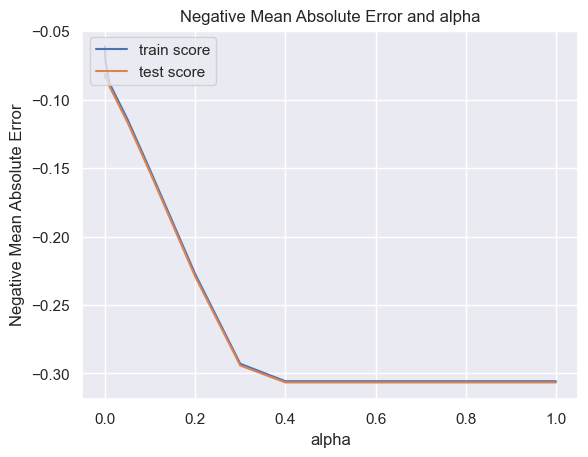

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

> **Insights:** From the above graph we can see that the Negative Mean Absolute Error is quite low at approx alpha = 0.4 and stabilises thereafter, but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [74]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.00867304,  0.03044799,  0.11553397,  0.04879775,
        0.        ,  0.03064907,  0.        ,  0.04125566,  0.00636007,
        0.        , -0.        ,  0.12387136,  0.00914318,  0.        ,
        0.        ,  0.        , -0.        , -0.00271948,  0.01504491,
        0.02956442,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09872746,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [75]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.009),
 ('LotArea', 0.03),
 ('OverallQual', 0.116),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.124),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.015),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('PropAge', 0.099),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),
 (

In [76]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8958715399659081
0.8790109980978466


In [77]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13793311057690832


> **Insights:** We can clearly see that the R2 values for Train and Test matches well, which is indicating an optimum model

In [78]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [79]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.024
1   MSSubClass  -0.000
2  LotFrontage   0.009
3      LotArea   0.030
4  OverallQual   0.116

In [80]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  12.024
13               GrLivArea   0.124
4              OverallQual   0.116
28                 PropAge   0.099
5              OverallCond   0.049
..                     ...     ...
207  SaleCondition_Partial   0.000
19            KitchenAbvGr  -0.003
163           HeatingQC_TA  -0.003
171         KitchenQual_TA  -0.008
131      Foundation_CBlock  -0.013

[208 rows x 2 columns]

In [81]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0             constant  12.024
13           GrLivArea   0.124
4          OverallQual   0.116
28             PropAge   0.099
5          OverallCond   0.049
9          TotalBsmtSF   0.041
7           BsmtFinSF1   0.031
3              LotArea   0.030
21          GarageArea   0.030
20          Fireplaces   0.015
2          LotFrontage   0.009
14        BsmtFullBath   0.009
10            1stFlrSF   0.006
132   Foundation_PConc   0.005
19        KitchenAbvGr  -0.003
163       HeatingQC_TA  -0.003
171     KitchenQual_TA  -0.008
131  Foundation_CBlock  -0.013

In [82]:
# These variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(18, 2)

In [83]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'PropAge', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'LotArea', 'GarageArea', 'Fireplaces', 'LotFrontage', 'BsmtFullBath', '1stFlrSF', 'Foundation_PConc', 'KitchenAbvGr', 'HeatingQC_TA', 'KitchenQual_TA', 'Foundation_CBlock']


In [84]:
Lassso_var = [i for i in Lassso_var if i != "constant"]
X_train_lasso = X_train[Lassso_var]
                        
X_train_lasso.head()

GrLivArea  OverallQual   PropAge  OverallCond  TotalBsmtSF  BsmtFinSF1  \
1041   0.289821    -0.075632 -0.232667     2.304249    -0.583395   -0.055199   
1265  -0.092554     0.659081  0.909986    -0.493768    -0.850020    0.061154   
1018  -0.050068     0.659081  0.616161    -0.493768    -1.600972   -0.986021   
284    0.168735    -0.075632  0.648808    -0.493768     1.312332    0.014613   
602    0.890998     1.393794  0.681455    -0.493768    -0.319216    0.850025   

       LotArea  GarageArea  Fireplaces  LotFrontage  BsmtFullBath  1stFlrSF  \
1041 -0.099094    0.074274   -0.910207     0.528985     -0.802414 -0.913512   
1265 -1.499054    0.178486   -0.910207    -1.603034      1.130377 -1.147204   
1018  0.330106   -0.314152    0.735239    -0.181688     -0.802414 -0.908139   
284  -0.389206    0.287435   -0.910207    -0.892361      1.130377  1.168231   
602   0.137303    0.178486    0.735239     0.528985      1.130377 -0.572374   

      Foundation_PConc  KitchenAbvGr  HeatingQC_TA  KitchenQual_TA  \
1041                 0     -0.207123             0               0   
1265                 1     -0.207123             0               0   
1018                 1     -0.207123             0               0   
284                  1     -0.207123             0               0   
602                  1     -0.207123             0               0   

      Foundation_CBlock  
1041                  1  
1265                  0  
1018                  0  
284                   0  
602                   0

In [85]:
X_train_lasso.shape

(884, 17)

In [86]:
X_test_lasso = X_test[Lassso_var]
                        
X_test_lasso.head()

GrLivArea  OverallQual   PropAge  OverallCond  TotalBsmtSF  BsmtFinSF1  \
1117  -1.107280    -0.726753 -0.103217     1.210334    -0.344519    0.728858   
528   -1.666024    -1.447799 -1.595321     1.210334    -1.250072   -0.151076   
26    -1.095680    -0.726753 -0.687084     1.210334    -0.329674   -0.434445   
994    0.485817     2.878476  1.129392    -0.507706     1.649676    1.897133   
609   -0.846275    -1.447799 -0.265402    -0.507706    -0.010504    1.228482   

       LotArea  GarageArea  Fireplaces  LotFrontage  BsmtFullBath  1stFlrSF  \
1117  0.112704   -0.061161   -0.923419    -0.591462      1.202264 -0.716020   
528  -0.070547   -2.102853   -0.923419    -0.546222      1.202264 -1.542788   
26   -0.592784    0.510513   -0.923419    -0.455742     -0.813922 -0.698855   
994   0.853411    1.463302    0.704375     1.172898      1.202264  1.641270   
609  -0.388346   -0.918672   -0.923419    -0.410502      1.202264 -0.329814   

      Foundation_PConc  KitchenAbvGr  HeatingQC_TA  KitchenQual_TA  \
1117                 0     -0.237067             0               0   
528                  0     -0.237067             0               1   
26                   0     -0.237067             1               0   
994                  1     -0.237067             0               0   
609                  0     -0.237067             0               1   

      Foundation_CBlock  
1117                  1  
528                   0  
26                    1  
994                   0  
609                   1

-----

### `Ridge regression`

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005535      0.003453         0.005509        0.004830      0.0001   
1       0.009428      0.007698         0.000000        0.000000       0.001   
2       0.008029      0.006460         0.003387        0.003419        0.01   
3       0.006260      0.007667         0.000000        0.000000        0.05   
4       0.003125      0.006250         0.006249        0.007654         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.094271          -0.083929          -0.101392   
1   {'alpha': 0.001}          -0.094257          -0.083890          -0.101280   
2    {'alpha': 0.01}          -0.094118          -0.083514          -0.100224   
3    {'alpha': 0.05}          -0.093594          -0.082149          -0.096599   
4     {'alpha': 0.1}          -0.093067          -0.080955          -0.093536   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.089855  ...        -0.091783        0.005819               27   
1          -0.089840  ...        -0.091741        0.005795               26   
2          -0.089697  ...        -0.091341        0.005574               25   
3          -0.089190  ...        -0.089959        0.004935               23   
4          -0.088816  ...        -0.088792        0.004553               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.060537           -0.060261           -0.057085   
1           -0.060538           -0.060264           -0.057081   
2           -0.060542           -0.060290           -0.057054   
3           -0.060571           -0.060378           -0.057137   
4           -0.060650           -0.060497           -0.057417   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.059490           -0.059057         -0.059286         0.001221  
1           -0.059492           -0.059059         -0.059287         0.001223  
2           -0.059512           -0.059077         -0.059295         0.001238  
3           -0.059580           -0.059174         -0.059368         0.001227  
4           -0.059656           -0.059270         -0.059498         0.001160  

[5 rows x 21 columns]

In [89]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.0795724641420639


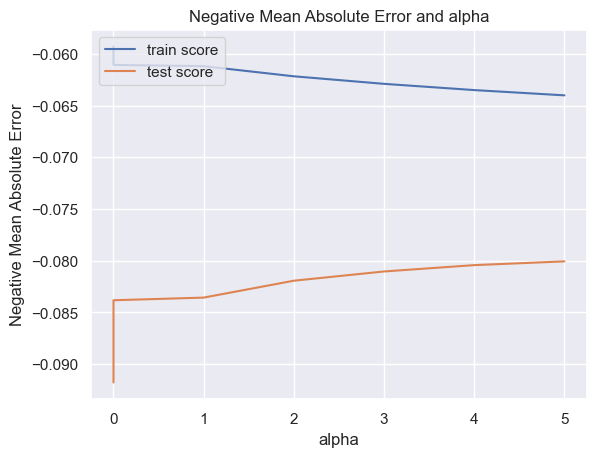

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

> **Insights:** here the Negative Mean Absolute Error stabilises at alpha = 2, hence we will choose this for further analysis

In [91]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.21809811e-04,  5.67743172e-03,  2.72937011e-02,  6.64222736e-02,
        5.30652098e-02,  6.26597507e-03,  2.51912102e-02,  9.10744149e-03,
        4.73622866e-02,  4.14654374e-02,  4.59496614e-02, -3.43352088e-04,
        7.41548414e-02,  1.64987508e-02,  4.59520318e-03,  1.10518834e-02,
        1.53315553e-02, -2.90756830e-03,  1.53711468e-04,  2.65959257e-03,
        1.05579132e-02,  4.42493467e-03,  2.48742107e-03,  1.20459859e-02,
        5.22982185e-03,  0.00000000e+00,  0.00000000e+00,  7.26767189e-02,
        7.84730209e-02,  9.26504358e-02,  9.32400875e-02,  7.37094218e-02,
        1.33987283e-02, -5.04828725e-03, -4.07431815e-03, -1.95401700e-02,
       -1.84761965e-02,  1.13192238e-02,  1.55561066e-02, -3.68395072e-02,
       -4.37767612e-02, -1.65461590e-02,  2.43649818e-02, -2.49689574e-02,
       -1.59334527e-02, -4.39532360e-02,  8.44265748e-03,  1.90168725e-02,
       -2.80309836e-02,  1.22357535e-01, -5.27837431e-02, -2.83778950e-02,
       -7.88786863e-02, -

In [92]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.732),
 ('MSSubClass', 0.001),
 ('LotFrontage', 0.006),
 ('LotArea', 0.027),
 ('OverallQual', 0.066),
 ('OverallCond', 0.053),
 ('MasVnrArea', 0.006),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.047),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.046),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.074),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.011),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.011),
 ('WoodDeckSF', 0.004),
 ('OpenPorchSF', 0.002),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('PropAge', 0.073),
 ('MSZoning_FV', 0.078),
 ('MSZoning_RH', 0.093),
 ('MSZoning_RL', 0.093),
 ('MSZoning_RM', 0.074),
 ('LotShape_IR2', 0.013),
 ('LotShape_IR3', -0.005),
 ('LotShape_Reg', -0.004),
 ('LandContour_HLS', -0.02),
 ('LandContour_Low', -0.018),
 ('LandContour_Lvl', 0.011),
 ('LotConfig_CulDSac', 0.016),
 ('LotConfi

In [93]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9468755902373939
0.8905930490197613


In [94]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1311650233004168


 > **Insights:** It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [95]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [96]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.732
50    Neighborhood_Crawfor   0.122
31             MSZoning_RL   0.093
30             MSZoning_RH   0.093
84       HouseStyle_2.5Unf   0.087
66    Neighborhood_StoneBr   0.082
95     Exterior1st_BrkFace   0.081
29             MSZoning_FV   0.078
197         SaleType_ConLD   0.078
206   SaleCondition_Normal   0.077
207  SaleCondition_Partial   0.076
70         Condition1_Norm   0.074
13               GrLivArea   0.074
32             MSZoning_RM   0.074
72         Condition1_PosN   0.074
28                 PropAge   0.073
123       MasVnrType_Stone   0.069
204   SaleCondition_Alloca   0.069
111    Exterior2nd_CmentBd   0.066
4              OverallQual   0.066

In [97]:
# Sorting the coefficients 
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.732
50   Neighborhood_Crawfor   0.122
31            MSZoning_RL   0.093
30            MSZoning_RH   0.093
84      HouseStyle_2.5Unf   0.087
..                    ...     ...
79         BldgType_Twnhs  -0.072
73        Condition1_RRAe  -0.076
180    GarageType_CarPort  -0.078
53    Neighborhood_IDOTRR  -0.079
54   Neighborhood_MeadowV  -0.131

[208 rows x 2 columns]

In [98]:
## we will remove the features which have coefficients as 0 
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.732
50   Neighborhood_Crawfor   0.122
31            MSZoning_RL   0.093
30            MSZoning_RH   0.093
84      HouseStyle_2.5Unf   0.087
..                    ...     ...
79         BldgType_Twnhs  -0.072
73        Condition1_RRAe  -0.076
180    GarageType_CarPort  -0.078
53    Neighborhood_IDOTRR  -0.079
54   Neighborhood_MeadowV  -0.131

[197 rows x 2 columns]

In [99]:
predRFE.shape

(197, 2)

> **Insights:** 
>
> - From the above two regression processess, we have seen thatthe model performance by Ridge Regression was better in terms of R2 values of Train and Test. 
> - But it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables. It is always advisable to use simple yet robust model.

### Now we will formulate the equation using the features and coefficients obtained by Lasso regression

In [100]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17']), inplace = True) 
pred

Variable   Coeff
C             constant  12.024
x1           GrLivArea   0.124
x2         OverallQual   0.116
x3             PropAge   0.099
x4         OverallCond   0.049
x5         TotalBsmtSF   0.041
x6          BsmtFinSF1   0.031
x7             LotArea   0.030
x8          GarageArea   0.030
x9          Fireplaces   0.015
x10        LotFrontage   0.009
x11       BsmtFullBath   0.009
x12           1stFlrSF   0.006
x13   Foundation_PConc   0.005
x14       KitchenAbvGr  -0.003
x15       HeatingQC_TA  -0.003
x16     KitchenQual_TA  -0.008
x17  Foundation_CBlock  -0.013

# The resultant equation:
    
**`Log(Y) = 12.024 + 0.124(x1) + 0.116(x2) +  0.099(x3) + 0.049(x4) + 0.041(x5) + 0.031(x6) + 0.030(x7) +  0.030(x8) + 0.015(x9) + 0.009(x10) + 0.009(x11) + 0.006(x12) + 0.005(x13) - 0.003(x14) - 0.003(x15) - 0.008(x16) - 0.013(x17) + Error term(RSS + alpha * (sum of absolute value of coefficients)`**

# *`Evaluation`*

Following are the observation and respective suggestion to consider while deciding house pricing:

- The higher values of positive coeeficients suggest a high sale value.

 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  PropAge   |Age of the property at the time of selling |
        
        
        
- The higher values of negative coeeficients suggest a decrease in sale value.

   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  KitchenQual_TA  |  Kitchen quality as Typical/Average  |
   |  Foundation_CBlock  |  Type of foundation as Cinder Block  |
   |  HeatingQC_TA	  |  Heating quality and condition as Average/Typical |
    

- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.



----

# ASSIGNMENT PART 2

**Question 1:** If we double the value of alpha for lasso and ridge regression

In [104]:
# At alpha = 0.02 for lasso, double the value of optimal case
alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
print("\npred : \n",pred)

Lassso_var = list(pred['Variable'])
print("\nLasso Variable : \n",Lassso_var)

0.8812530010285881
0.8657693012053155
RMSE : 0.14528524455773112

pred : 
               Variable   Coeff
0             constant  12.024
13           GrLivArea   0.124
4          OverallQual   0.116
28             PropAge   0.099
5          OverallCond   0.049
9          TotalBsmtSF   0.041
7           BsmtFinSF1   0.031
3              LotArea   0.030
21          GarageArea   0.030
20          Fireplaces   0.015
2          LotFrontage   0.009
14        BsmtFullBath   0.009
10            1stFlrSF   0.006
132   Foundation_PConc   0.005
19        KitchenAbvGr  -0.003
163       HeatingQC_TA  -0.003
171     KitchenQual_TA  -0.008
131  Foundation_CBlock  -0.013

Lasso Variable : 
 ['constant', 'GrLivArea', 'OverallQual', 'PropAge', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'LotArea', 'GarageArea', 'Fireplaces', 'LotFrontage', 'BsmtFullBath', '1stFlrSF', 'Foundation_PConc', 'KitchenAbvGr', 'HeatingQC_TA', 'KitchenQual_TA', 'Foundation_CBlock']


In [108]:
# At alpha = 4 for ridge, double the value of optimal casealpha = 2
ridge = Ridge(alpha=4)

ridge.fit(X_train, y_train)
print("ridge coefficient : ",ridge.coef_)

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("\nTrain pred : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("\nTest pred : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('\nRMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

# Sorting the coefficients 
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)

## we will remove the features which have coefficients as 0 
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
print('\npredicted RFE : \n',predRFE)

print('\npredicted shape : ',predRFE.shape)

ridge coefficient :  [-2.01970468e-03  6.85572353e-03  2.66994827e-02  6.89618196e-02
  5.46538384e-02  6.32755228e-03  2.63856184e-02  8.94440550e-03
  4.64365529e-02  4.26780088e-02  4.52879025e-02 -5.34053397e-04
  7.45004402e-02  1.63140198e-02  4.36994126e-03  1.12036034e-02
  1.51336491e-02 -3.11155583e-03 -6.41296392e-04  4.03246429e-03
  1.08765748e-02  4.56278045e-03  2.37158141e-03  1.25869194e-02
  5.13460528e-03  0.00000000e+00  0.00000000e+00  7.42927986e-02
  4.93934510e-02  5.77797564e-02  6.34068122e-02  3.45072137e-02
  1.20342647e-02 -6.67679985e-03 -5.06062702e-03 -1.49312878e-02
 -1.85014333e-02  9.42218505e-03  1.62164249e-02 -2.96627043e-02
 -2.97510627e-02 -1.50383516e-02  2.20108042e-02 -1.88072593e-02
 -6.38568119e-03 -2.99494812e-02  1.49145188e-02  2.00151876e-02
 -2.41453623e-02  1.14577962e-01 -4.44031906e-02 -2.55727182e-02
 -6.97399624e-02 -9.85413687e-02 -2.26151613e-02 -3.28288277e-02
  4.00332716e-02 -2.04416320e-02  1.56181127e-03  3.33470287e-02
 -3.